# Beleg 1: CT Daten im DICOM Format

**Name:** Philipp Jörg Saal
<br>
**Matrikelnr.:** 555915

## Bearbeitungszeitraum
**Bearbeitungsbeginn:** Do, 28.10.2021
<br>
**Abgabe:** Mi, 24.11.2021, 23.55 Uhr

**Hinweise zur Abgabe**

- Füllen Sie unbedingt die erste Zelle unterhalb der Überschrift mit Name und Matr.-Nr. aus!
- Ergänzen Sie den Dateinamen des Notebooks vor der Abgabe um `_` und Ihre Matr.-Nr. (`Uebung 2 - Roentgen und CT_s0500000.ipynb`)
- Entfernen Sie vor dem Upload alle Ausgaben aus dem Notebook!
- Die Datei `dicom_ct.dcm` sowie die eingebundene SVG-Grafik muss nicht abgegeben werden.

**Hinweise zur Benotung**

- Mit dieser Aufgabe können 20 von den insgesamt 100 Punkten der Gesamtbewertung für die Übung erreicht werden.


### Viel Erfolg!

### Aufgabe 1: Grauwertbilder

In der ersten Aufgabe werden die wesentlichen Grundlagen von Bildern behandelt. Zunächst wird ein einzelnes Grauwertbild eingelesen und visualisiert. Anschließend wird die zugrundeliegende Bildmatrix hinsichtlich ihrer Größe und des dargestellten Wertebereichs untersucht. Für das Einlesen der Bilder gibt es keine Vorgaben zu Libraries, Sie können hier frei wählen. Aufgrund der weiten Verbreitung empfehle ich Ihnen, mit OpenCV oder PIL zu arbeiten. Für die Visualisierung soll das `matplotlib`-Paket verwendet werden. Alle Bilder sollen *inline* in diesem Notebook ausgegeben werden (fügen Sie in die erste Zelle zur Sicherheit die Zeile `%matplotlib inline` ein).

**Aufgabe 1.1**: Lesen Sie das Bild `dicom_normalized.png` ein und visualisieren/plotten Sie es mit `matplotlib`. <br>


In [1]:
# 1.1
from PIL import Image as PIL
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

img = PIL.open("./resources/dicom_normalized.png")

In [2]:
%matplotlib inline

print(img)


<PIL.PngImagePlugin.PngImageFile image mode=L size=512x512 at 0x1076BEA00>


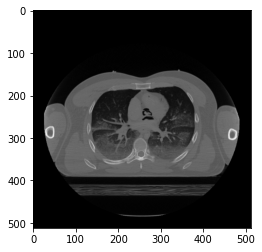

In [3]:
plt.imshow(img, cmap="gray")

**Aufgabe 1.2**: Geben Sie die Dimensionen des Bildes (Pixel entlang der x- und y-Achse) aus. <br>

In [4]:
# 1.2
width, height = img.size

print('Y: ',height)
print('X: ', width)

Y:  512
X:  512


**Aufgabe 1.3**: Untersuchen Sie die Bildmatrix, was ist der kleinste und was der größte Wert?

In [5]:
# 1.3
imgMatrix = np.asanyarray(img.convert('L'))

minVal_matrix = imgMatrix.min()
maxVal_matrix = imgMatrix.max()

print('Min Value: ',minVal_matrix)
print('Max Value: ', maxVal_matrix)

Min Value:  0
Max Value:  255


### Aufgabe 2: CT Daten

Innerhalb der Radiologie werden verschiedene Verfahren zur medizinischen Bildgebung eingesetzt, u.a. das Röntgen und die Computertomographie. Beiden Verfahren liegen die physikalischen Eigenschaften der Röntgenstrahlung und deren Abschwächung bei der Durchstrahlung von Materie zugrunde. Die durch digitale Röntgen- und CT-Bilder visualisierte Messgröße ist jedoch nicht direkt die detektierte Restintensität, sondern ein Schwächungsprofil (vereinfacht kann von Ausgangsintensität - Restintensität ausgegangen werden).

Radiologische Bilder werden im standardisierten DICOM-Format gespeichert und übertragen. In einer DICOM-Datei sind neben dem eigentlichen Bild weitere Meta-Daten, z.B. Name des Patienten, Studienbezeichnung oder Parameter des Bildes, abgelegt.


**Aufgabe 2.1**: Nutzen Sie den folgenden Code, um ein Beispielbild (Variabe "im") aus einem CT Datensatz zu laden. Geben Sie auch zu diesem Bild die Dimensionen und den Wertebereich an. 

In [6]:
import pydicom
from pydicom.data import get_testdata_file

testdataPath = get_testdata_file("CT_small.dcm")
testdata = pydicom.dcmread(testdataPath)
im = testdata.pixel_array

In [12]:
minVal_matrix_dicom = im.min()
maxVal_matrix_dicom = im.max()

print('Min Value: ',minVal_matrix_dicom)
print('Max Value: ', maxVal_matrix_dicom)

dimension__dicom = im.shape[0]

print(dimension__dicom)

Min Value:  128
Max Value:  2191
128
(128, 128)


Sie werden feststellen, dass sich die beiden Bilder deutlich in ihren Wertebereich unterscheiden. Das erste Bild ist ein "klassisches" Grauwertbild mit einem 8-Bit Wertebereich. Um die Werte des CT Bildes zu verstehen, lesen Sie sich folgende Fakten zu Röntgen- und CT-Bildern durch:

Bei CT-Bildern sind die Werte der Bildpunkte in der Pixel-Matrix bereits in den aus den Schwächungsprofilen bestimmten Hounsfield Units HU angegeben (teilweise mit einem Offset versehen, um negative Werte zu vermeiden). Bereiche mit geringer Röntgenschwächung (Luft, Weichteile) führen zu hohen Restintensitäten, weisen jedoch geringe Werte auf der Hounsfield-Skala auf, so dass diese im Graustufenbild dunkel dargestellt werden. Durch diese Umrechnung von Restintensität in Hounsfield Units wird die von den Röntgenfilmen gewohnte Visualisierung (Knochen hell, Weichteile und Luft dunkel) nachempfunden (die eigentlich ausschlaggebende Motivation zur Hounsfield-Skala wurde in der Vorlesung erläutert).

- die Pixel-Werte der Bilddaten weisen eine höhere Bandbreite als die 256 Graustufen des RGB-Farbraums auf
    - Röntgen: i.d.R. 1024 Signalwerte (10-Bit) aber auch bis zu 4096 Signalwerte (12-Bit)
    - Computertomographie: 4096 Signalwerte (12-Bit)
    
    
- zur Visualisierung ist die Abbildung der Signalwerte in Grauwerte nötig - dies kann unterschiedlich erfolgen
    - Abbildung des gesamten Signal-Intervalls auf 256 Grauwerte - immer 4 (Röntgen) bzw. 16 (CT) Signalwerte werden auf einen Grauwert abgebildet
        - **Vorteil:** Alle Signalwerte werden visualisiert
        - **Nachteil:** Kontrast geht verloren (besonders im Bereich der Weichteile)
    - Auswahl eines diagnostisch relevanten Signalbereichs - nur Signalwerte innerhalb des Bereichs werden auf die 256 Grauwerte abgebildet (Signalwerte außerhalb des Bereichs werden auf die Grauwerte 0 bzw. 255 gesetzt); dies wird als Fensterung (Windowing) bzw. Fenster-Funktion (Window function) bezeichnet 
        - **Vorteil:** Hoher Kontrast im relevanten Signalbereich
        - **Nachteil:** Bei wechselnder Fragestellung muss Visualisierung erneut berechnet werden - ggf. müssen mehrere Grauwertbilder betrachtet werden
        
        
Als nächstes wird untersucht, wie der Wertebereich des CT Bildes auf den 8-Bit Wertebereich (zwischen 0 und 255) abgebildet werden kann.

**Aufgabe 2.2**: Bilden Sie den Wertebereich der Liste `ctSampleValues` auf den 8-Bit Wertebereich ab. Wenn ihr Ansatz richtig funktioniert, sollte das Ergebnis der Liste `grayscaleSampleValuesNormalized` entsprechen. Bilden Sie zusätzlich den vollständigen Wertebereich des CT Bildes (12-Bit) auf den 8-Bit Wertebereich ab und wenden Sie dies auf die Liste `ctSampleValues` an. Wenn ihr Ansatz richtig funktioniert, sollte das Ergebnis der Liste `grayscaleSampleValues` entsprechen. Bilden Sie zusätzlich den vollständigen Wertebereich des CT Bildes (12-Bit) auf den 8-Bit Wertebereich ab. 



In [8]:
ctSampleValues = [0, 916, 12, 188, 778, 256, 4000, 3]
grayscaleSampleValuesNormalized = [0, 58, 0, 11, 49, 16, 255, 0]
grayscaleSampleValues = [0, 57, 0, 11, 48, 16, 250, 0]

def convertTo8Bit(values, valueScale = 0):
    if(type(values) is list ):
        values = np.asarray(values)
    
    if (valueScale == 0):
        valueScale = np.amax(values)
    
    ratio = valueScale / 256

    norm = (values/ratio)
    
    for i in range(values.size):
        if(norm[i] >255):
            norm[i] = 255
    
    converted = norm.astype('uint8')
    return converted
    
testGrayscaleSampleValuesNormalized=convertTo8Bit(ctSampleValues)
testGrayscaleSampleValues = convertTo8Bit(ctSampleValues,4096)

print(testGrayscaleSampleValuesNormalized)
print(testGrayscaleSampleValues)

[  0  58   0  12  49  16 255   0]
[  0  57   0  11  48  16 250   0]


**Aufgabe 2.3**: Wenden Sie das Verfahren auf das DICOM Bild an. Visualisieren Sie das Bild und zeigen Sie anhand der Pixelwerte, dass ihr Ansatz funktioniert.

In [9]:
def convertPicTo8Bit(retArr, maxVal):
    for i in range(retArr.shape[0]):
        retArr[i] = convertTo8Bit(retArr[i],maxVal)

255
14


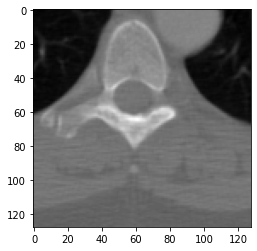

In [10]:
im8bit = im.copy()
convertPicTo8Bit(im8bit, im.max())
plt.imshow(im8bit , cmap="gray")

minVal_matrix_dicom_new = im8bit.min()
maxVal_matrix_dicom_new = im8bit.max()
print(im8bit.max())
print(im8bit.min())